In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
#Name of the CSV file
file = './project_1 HW files, Combined_data_df8.csv'

#Pull in the landfill data into a dataframe
combined_df= pd.read_csv(file)
combined_df

,Unnamed: 0,Landfill Name,State_x,County,State_y,"Age-Adjusted Incidence Rate - cases per 100,000",Average Annual Count,Recent Trend,Clean State
0,0,Anchorage Regional Landfill,AK,Anchorage,0,0.0,0,0,0
1,1,Capitol Disposal Landfill,AK,Juneau,0,0.0,0,0,0
2,2,Central Peninsula Landfill (CPL),AK,Kenai Peninsula,0,0.0,0,0,0
3,5,Palmer Central Landfill,AK,Matanuska-Susitna,0,0.0,0,0,0
4,6,South Cushman Landfill,AK,Fairbanks North Star,Alaska,386.2,317,falling,AK
...,...,...,...,...,...,...,...,...,...
848,2621,Tucker County Landfill,WV,Tucker,West Virginia,527.4,59,falling,WV
849,2623,Wetzel County Landfill,WV,Wetzel,West Virginia,499.3,117,stable,WV
850,2625,Casper Balefill,WY,Natrona,Wyoming,419.9,382,falling,WY
851,2626,Cheyenne Landfill,WY,Laramie,Wyoming,443.5,491,falling,WY


In [4]:
combined_df["State"] = combined_df["State_x"]
combined_df["Age-Adjusted Incidence Rate - cases per 100,000"].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4      386.2
       ...  
848    527.4
849    499.3
850    419.9
851    443.5
852      NaN
Name: Age-Adjusted Incidence Rate - cases per 100,000, Length: 853, dtype: float64

In [5]:
cancer_data = combined_df[combined_df["Average Annual Count"] > 0]
cancer_data = cancer_data[['Landfill Name', 'State', 'County','Average Annual Count']]
cancer_data

output_data_file = "./average_annual_cancer_landfills.csv"

cancer_data.to_csv(output_data_file)

In [6]:
cancer_data_2 = combined_df[combined_df['Age-Adjusted Incidence Rate - cases per 100,000'] > 0]
cancer_data_2 = cancer_data_2[['Landfill Name', 'State', 'County','Age-Adjusted Incidence Rate - cases per 100,000']]

output_data_file_2 = "./incidence_rate_landfill.csv"

cancer_data.to_csv(output_data_file_2)

In [7]:
cancer_data_2.describe()

,"Age-Adjusted Incidence Rate - cases per 100,000"
count,765.000000
mean,452.272680
std,49.942346
min,232.700000
25%,423.600000
50%,455.400000
75%,485.400000
max,610.100000


#### The rate of new cases of cancer (cancer incidence) is 442.4 per 100,000 men and women per year (based on 2013–2017 cases).

Cancer Statistics - National Cancer Institute

In [8]:
#Chi-Squared Test
#Add expected column - Expected Incidence rate comes from NCI (above)
cancer_data_2["Expected Incidence"] = 442.4
cancer_data_2 = cancer_data_2[['Landfill Name', 'State', 'County',
                               'Age-Adjusted Incidence Rate - cases per 100,000',
                               'Expected Incidence']]
cancer_data_2

,Landfill Name,State,County,"Age-Adjusted Incidence Rate - cases per 100,000",Expected Incidence
4,South Cushman Landfill,AK,Fairbanks North Star,386.2,442.4
5,Unalaska Landfill,AK,Aleutians West,387.8,442.4
7,Arrowhead Landfill,AL,Perry,449.7,442.4
8,Athens/Limestone County SLF MSWLF,AL,Limestone,462.5,442.4
9,Bishop Landfill Company,AL,Marshall,443.7,442.4
...,...,...,...,...,...
847,Raleigh County SWA Landfill,WV,Raleigh,483.5,442.4
848,Tucker County Landfill,WV,Tucker,527.4,442.4
849,Wetzel County Landfill,WV,Wetzel,499.3,442.4
850,Casper Balefill,WY,Natrona,419.9,442.4


In [15]:
cancer_data_2['Age-Adjusted Incidence Rate - cases per 100,000'].mean()

452.27267973856203

In [9]:
# FIND CRITICAL VALUE
# The degree of freedom is 765-1 = 764
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 764)
critical_value

829.4135301246924

In [10]:
#RUN CHI-SQUARED TEST
stats.chisquare(cancer_data_2['Age-Adjusted Incidence Rate - cases per 100,000'], cancer_data_2['Expected Incidence'])

Power_divergenceResult(statistic=4475.954294755878, pvalue=0.0)

### The statistic (4475.95) is greater than the critical value (829.41), therefore the results are statistically significant.

In [21]:
#Box Plots - Quartiles
quartiles = cancer_data_2['Age-Adjusted Incidence Rate - cases per 100,000'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Age-Adjusted Incidence Rate is: {lowerq}")
print(f"The upper quartile of Age-Adjusted Incidence Rate is: {upperq}")
print(f"The interquartile range of Age-Adjusted Incidence Rate is: {round(iqr,2)}")
print(f"The the median of Age-Adjusted Incidence Rate is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Age-Adjusted Incidence Rate is: 423.6
The upper quartile of Age-Adjusted Incidence Rate is: 485.4
The interquartile range of Age-Adjusted Incidence Rate is: 61.8
The the median of Age-Adjusted Incidence Rate is: 455.4 
Values below 330.9 could be outliers.
Values above 578.1 could be outliers.


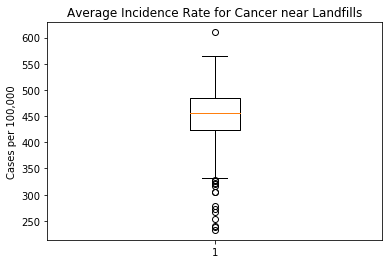

<Figure size 432x288 with 0 Axes>

In [14]:
Incidence_rate = cancer_data_2['Age-Adjusted Incidence Rate - cases per 100,000']

fig1, ax1 = plt.subplots()
ax1.set_title('Average Incidence Rate for Cancer near Landfills')
ax1.set_ylabel('Cases per 100,000')
ax1.boxplot(Incidence_rate)
plt.show()

plt.savefig("./Average Incidence Rate for Cancer near Landfills.png")